In [1]:
import numpy as np
#importing sth to ignore the error code during PRC training
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import pandas as pd
import matplotlib.pyplot as plt
import pickle
from skimage import io, color, transform, feature, data
from skimage.feature import hog
from my_measures import BinaryClassificationPerformance  
from sklearn.model_selection import train_test_split
%matplotlib inline

import matplotlib.image as mpimg
from matplotlib.image import imread
import os

#note here, I have lost track which ones of these I actually do need.
#clean up follows!

In [2]:
## reading in images from dataset & plot it

directory = "./DATASET_NUMBERED/"
#test to see if things import correctly:
#img = imread(imgs_path + "jacopo.png")
#plt.figure(figsize=(18,10))
#plt.imshow(img)


#image transformation into array 
#this is something I came across in another class and whated to play around with some more!

#img = imread(directory + "jacopo.png")
#np_image = np.array(img)
#print(np_image.shape)

#now write function that loops through directory & transforms each image into an array
for filename in os.listdir(directory):
    #print(filename)
    img = imread(directory + filename)
    np_image = np.array(img) #I could add dtype=int but that makes me loose details
    #print(np_image.shape) #this returns sth like (537,537,4) which = (sizex,sizey, number of colourchannels)
    #needs reshaping into array with 2(?)columns:
    #I originally had 4 but that did not work
    X = np_image.reshape(-1,4)
    print(X)

    
    
# STUFF THAT DID NOT WORK:

#def image_manipulation(directory,filename,imview=False):
    
    #img = imread(directory + filename + '.png')
    #np_image = np.array(img)
    
   # print(np_image.shape)
    #return transformed_image

#for each in directory:
   # if each.endswith(".png"):
       # print("that's a png")
        #image_manipulation("jacopo")


# test the function, look at input/output
#test_image = image_manipulation("jacopo",imgs_path, True)
#print('downscaled image shape: ')
#print(test_image.shape)
#print('image representation (first row of pixels): ')
#print(test_image[0])
#print('\n')
#print('example of transformation: ')


[[0.9764706  0.9254902  0.8509804  1.        ]
 [0.9764706  0.9254902  0.8509804  1.        ]
 [0.98039216 0.92941177 0.85490197 1.        ]
 ...
 [0.8666667  0.7490196  0.654902   1.        ]
 [0.8156863  0.69803923 0.6039216  1.        ]
 [0.7607843  0.6431373  0.54901963 1.        ]]
[[0.6862745  0.36862746 0.29411766 1.        ]
 [0.6901961  0.37254903 0.29803923 1.        ]
 [0.6901961  0.37254903 0.29803923 1.        ]
 ...
 [0.67058825 0.26666668 0.19215687 1.        ]
 [0.69411767 0.27450982 0.20392157 1.        ]
 [0.78039217 0.34509805 0.2784314  1.        ]]
[[0.6313726  0.76862746 0.85490197 1.        ]
 [0.6313726  0.76862746 0.85490197 1.        ]
 [0.627451   0.7647059  0.8509804  1.        ]
 ...
 [0.45490196 0.5137255  0.60784316 1.        ]
 [0.47058824 0.5294118  0.61960787 1.        ]
 [0.49411765 0.54509807 0.6313726  1.        ]]
[[0.9411765  0.8156863  0.7176471  1.        ]
 [0.9411765  0.8156863  0.7176471  1.        ]
 [0.9411765  0.8156863  0.7176471  1.     

 [0.9882353  0.99215686 0.972549   1.        ]]
[[0.59607846 0.49411765 0.3882353  1.        ]
 [0.5764706  0.4745098  0.36862746 1.        ]
 [0.5137255  0.4117647  0.30588236 1.        ]
 ...
 [0.72156864 0.73333335 0.7529412  1.        ]
 [0.7176471  0.7294118  0.7490196  1.        ]
 [0.70980394 0.72156864 0.7411765  1.        ]]
[[0.7294118  0.84313726 0.654902   1.        ]
 [0.72156864 0.8352941  0.64705884 1.        ]
 [0.7137255  0.827451   0.6392157  1.        ]
 ...
 [0.8509804  0.80784315 0.5647059  1.        ]
 [0.8745098  0.83137256 0.5882353  1.        ]
 [0.8666667  0.8235294  0.5803922  1.        ]]
[[0.01960784 0.02745098 0.02352941 1.        ]
 [0.01960784 0.02745098 0.02352941 1.        ]
 [0.01960784 0.02745098 0.02352941 1.        ]
 ...
 [0.03529412 0.05098039 0.05490196 1.        ]
 [0.03529412 0.05098039 0.05490196 1.        ]
 [0.03529412 0.05098039 0.05490196 1.        ]]
[[0.23529412 0.50980395 0.70980394 1.        ]
 [0.24313726 0.5176471  0.7137255  1.    

In [3]:
#Alright, I did not know that before writing most of the code, buuuuut KMeans seems to not allow me to 
#insert a 4D matrix so I need to transform it into a 2D one above!
#update:I changed that back again because I was unsure again

In [4]:
#import KMeans
from sklearn.cluster import KMeans

#create Kmeans object
#set the number of clusters in the final model
km = KMeans(n_clusters=4,init='k-means++', max_iter=100, n_init=1)

#fit km object to dataset
km.fit(X)

#check where the centroids are
centroids = km.cluster_centers_
print(centroids)



[[0.25557005 0.18611501 0.15997219 1.        ]
 [0.9975599  0.98670214 0.9818249  1.        ]
 [0.04004166 0.027888   0.02712709 1.        ]
 [0.64150757 0.4833464  0.44254288 1.        ]]


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster Nr.1
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


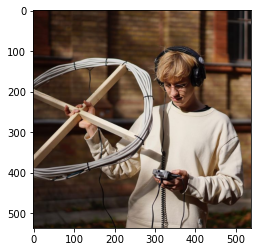

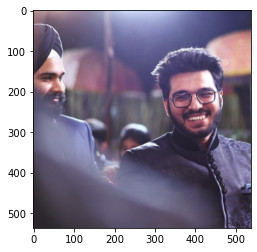

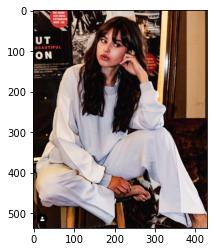

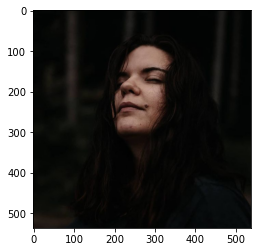

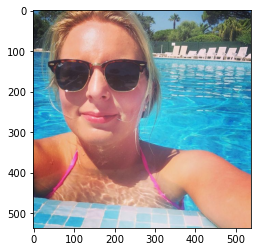

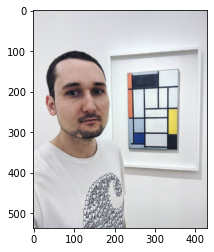

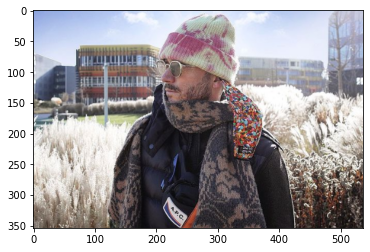

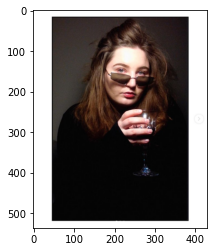

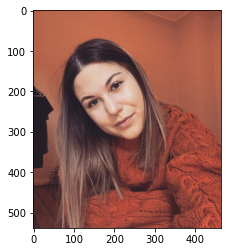

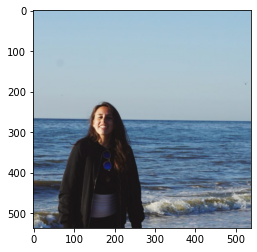

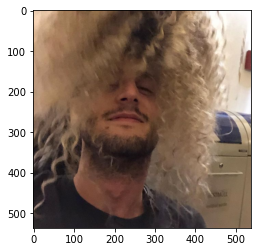

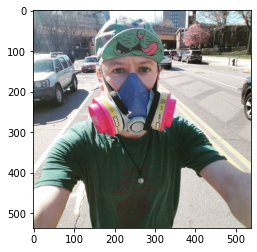

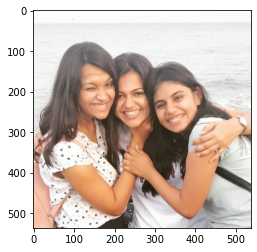

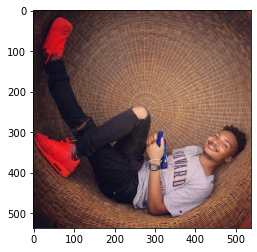

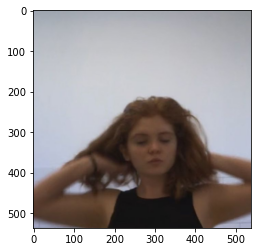

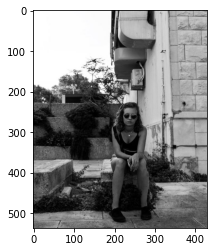

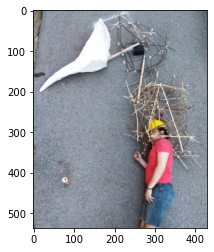

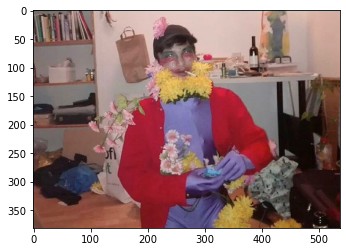

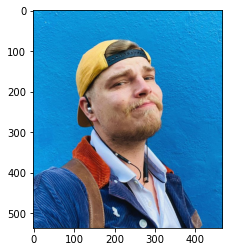

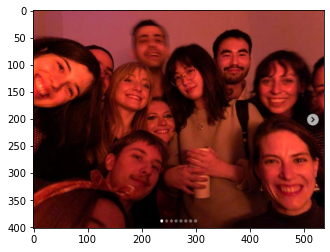

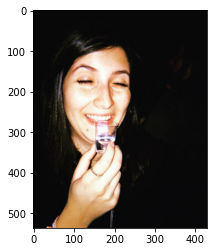

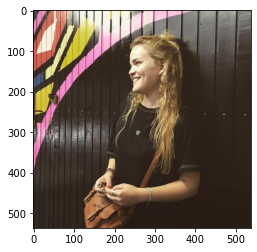

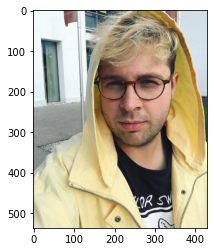

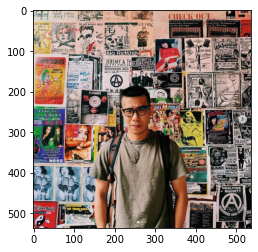

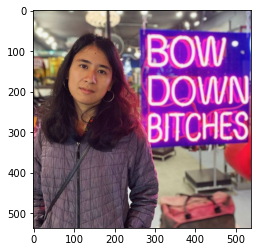

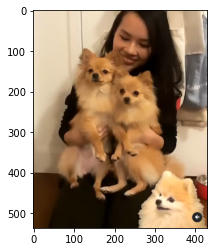

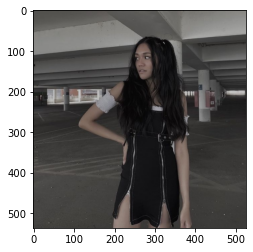

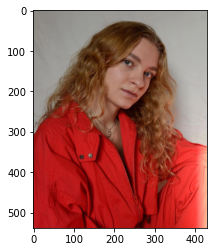

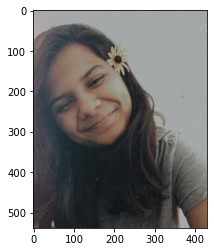

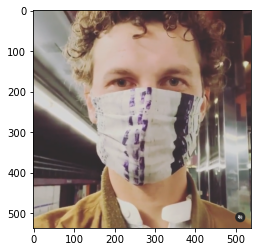

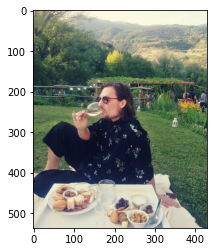

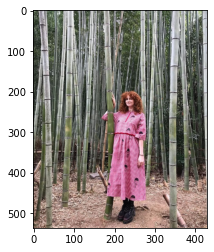

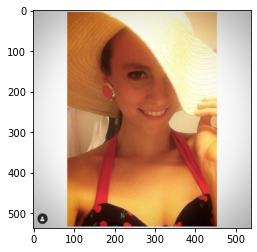

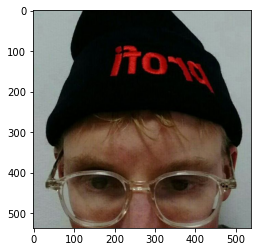

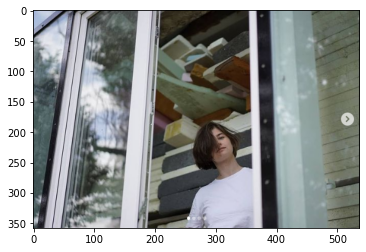

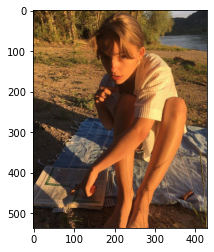

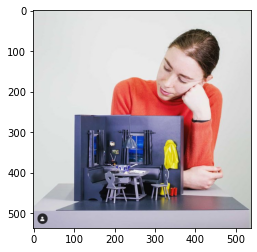

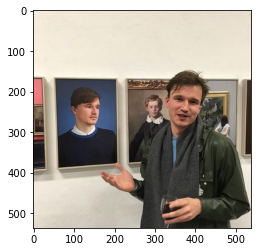

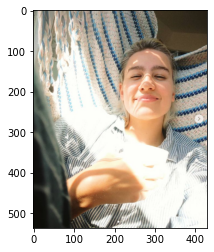

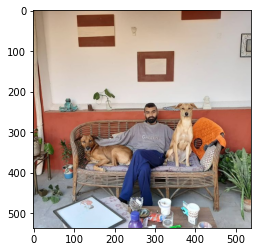

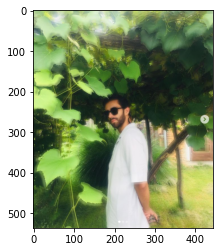

FileNotFoundError: [Errno 2] No such file or directory: './DATASET_NUMBERED/43.png'

In [5]:
#TRYOUT 1
#print sections for clusters + plot images
for i in km.labels_:
    print(" ")
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    print("Images in cluster Nr." + str(i))
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    
    for j in range(0, len(km.labels_)):
       if km.labels_[j] == i and km.labels_[j] <= 42:
            img = mpimg.imread(directory + str(j+2) + '.png')
            imgplot =plt.imshow(img)
            plt.show()
            
            #print(str(j+2) + '_small.jpg')

In [6]:
#TRYOUT 2

#print sections for clusters
for i in range(0,4):
    print(" ")
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    print("Images in cluster Nr." + str(i))
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    
#check if image array is in cluster

for j in range(0, len(km.labels_)):
    for centroid in centroids:
        if km.labels_[j].any == centroid.any:
            img = mpimg.imread(directory + str(j+1) + '.png')
            imgplot =plt.imshow(img)
            plt.show()

 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster Nr.0
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster Nr.1
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster Nr.2
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster Nr.3
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


In [ ]:
#STATUS QUO:
# this is currently the most functional version of the code I have
# hings are not yet working as planned 
# Tryout one prints the whole image dataset
# yet it clusters them into only one cluster 
# Tryouttwo at least prints all of the clusters again, yet they are empty
# I am in contact with both Aaron Hill and Seth Kranzler to try and get this working
# It seems I am trying something slightly unconventional here and the errors 
#I am getting might come directly from using conda, but we'll see! I will keep working on this!
